In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn as sk
import copy
from collections import Counter

from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

In [2]:
Cerebral_Stroke=pd.read_csv("dataset.csv")

# Data Preprocessing

In [3]:
Cerebral_Stroke

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


In [4]:
Cerebral_Stroke.describe(include='all')

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,43400.000000,43400,43400.000000,43400.000000,43400.000000,43400,43400,43400,43400.000000,41938.000000,30108,43400.000000
unique,NaN,3,NaN,NaN,NaN,2,5,2,NaN,NaN,3,NaN
top,NaN,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,NaN,25665,NaN,NaN,NaN,27938,24834,21756,NaN,NaN,16053,NaN
mean,36326.142350,NaN,42.217894,0.093571,0.047512,NaN,NaN,NaN,104.482750,28.605038,NaN,0.018041
std,21072.134879,NaN,22.519649,0.291235,0.212733,NaN,NaN,NaN,43.111751,7.770020,NaN,0.133103
min,1.000000,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.000000,10.100000,NaN,0.000000
25%,18038.500000,NaN,24.000000,0.000000,0.000000,NaN,NaN,NaN,77.540000,23.200000,NaN,0.000000
50%,36351.500000,NaN,44.000000,0.000000,0.000000,NaN,NaN,NaN,91.580000,27.700000,NaN,0.000000
75%,54514.250000,NaN,60.000000,0.000000,0.000000,NaN,NaN,NaN,112.070000,32.900000,NaN,0.000000


In [5]:
Cerebral_Stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                41938 non-null  float64
 10  smoking_status     30108 non-null  object 
 11  stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


In [6]:
Cerebral_Stroke.nunique()

id                   43400
gender                   3
age                    104
hypertension             2
heart_disease            2
ever_married             2
work_type                5
Residence_type           2
avg_glucose_level    12543
bmi                    555
smoking_status           3
stroke                   2
dtype: int64

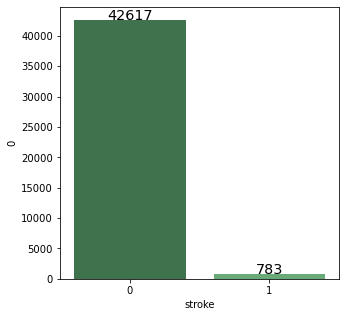

In [7]:
#Calculating count of Stroke vs No Stroke cases
plt.figure(figsize=(5,5))
target_group = Cerebral_Stroke.groupby('stroke').size().reset_index()
pal = sns.color_palette("Greens_d", len(target_group))
rank = target_group["stroke"].argsort().argsort()
g = sns.barplot(x = target_group['stroke'],y = target_group[0],palette=np.array(pal[::-1])[rank] )

for index, row in target_group.iterrows():
    g.text(row['stroke'],row[0], round(row[0],2), color='black', ha="center",fontsize='x-large')

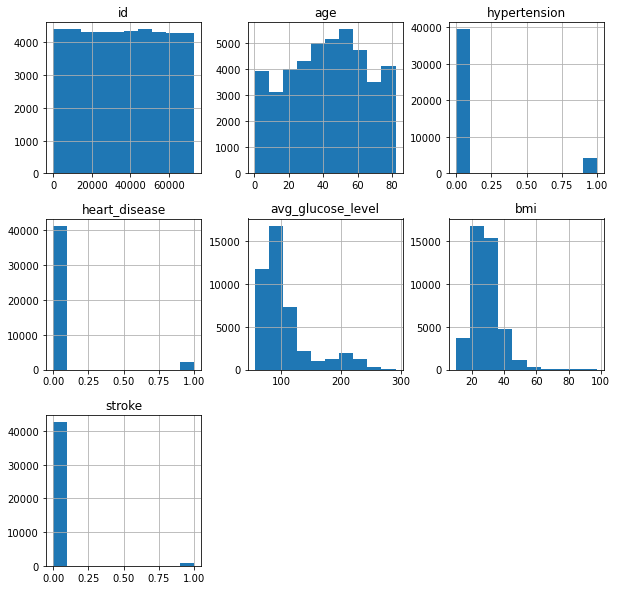

In [8]:
#Distribution of continuous 
Cerebral_Stroke.hist(figsize=(10,10))
plt.show()

In [9]:
#all the categorical columns with their values -
cols=Cerebral_Stroke.describe(include="O").columns
for i in cols:
    print("Distinct_values :\n 'column_name' =",i)
    print(Cerebral_Stroke[i].unique())
    print("")


Distinct_values :
 'column_name' = gender
['Male' 'Female' 'Other']

Distinct_values :
 'column_name' = ever_married
['No' 'Yes']

Distinct_values :
 'column_name' = work_type
['children' 'Private' 'Never_worked' 'Self-employed' 'Govt_job']

Distinct_values :
 'column_name' = Residence_type
['Rural' 'Urban']

Distinct_values :
 'column_name' = smoking_status
[nan 'never smoked' 'formerly smoked' 'smokes']



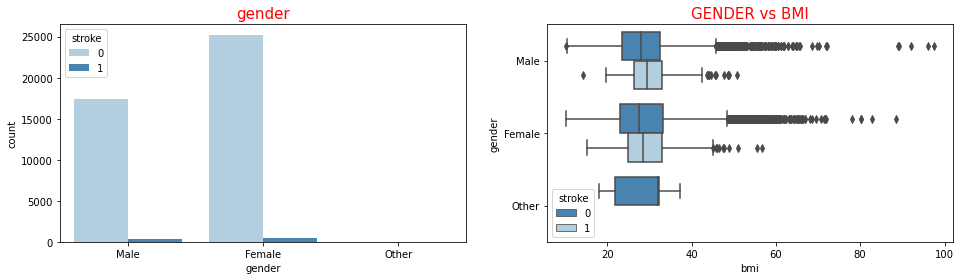

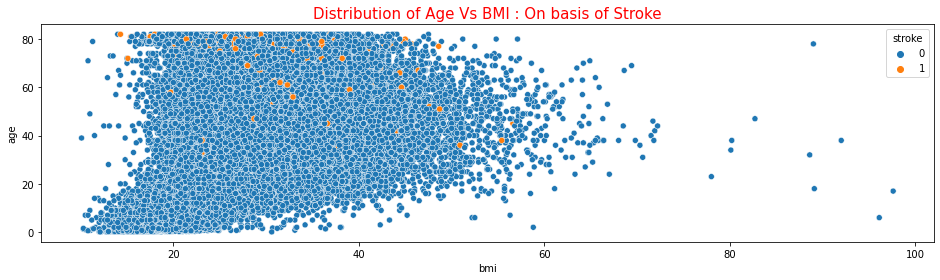

In [10]:
plt.figure(figsize=(16,4))
plt.subplot(121)
sns.countplot(Cerebral_Stroke["gender"],hue="stroke",data=Cerebral_Stroke,palette="Blues")
plt.title("gender",fontsize=15,color="Red")
plt.subplot(122)
sns.boxplot(x="bmi",y="gender",hue="stroke",data=Cerebral_Stroke,palette="Blues_r")
plt.title("GENDER vs BMI",fontsize=15,color="Red")
plt.figure(figsize=(16,4))
sns.scatterplot(Cerebral_Stroke["bmi"],Cerebral_Stroke["age"],hue=Cerebral_Stroke["stroke"])
plt.title("Distribution of Age Vs BMI : On basis of Stroke",fontsize=15,color="Red")
plt.show()

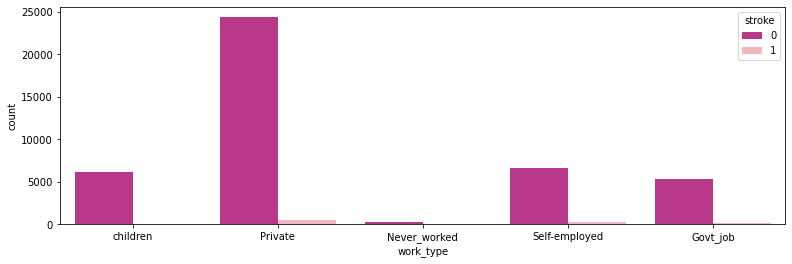

In [11]:
plt.figure(figsize=(13,4))
sns.countplot(Cerebral_Stroke["work_type"],hue="stroke",data=Cerebral_Stroke,palette="RdPu_r")
plt.show()

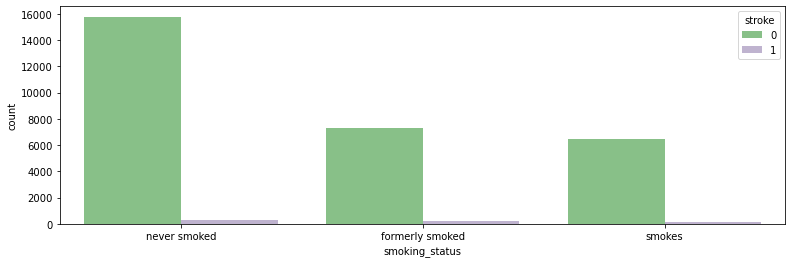

In [12]:
plt.figure(figsize=(13,4))
sns.countplot(Cerebral_Stroke["smoking_status"],hue="stroke",data=Cerebral_Stroke,palette="Accent")
plt.show()

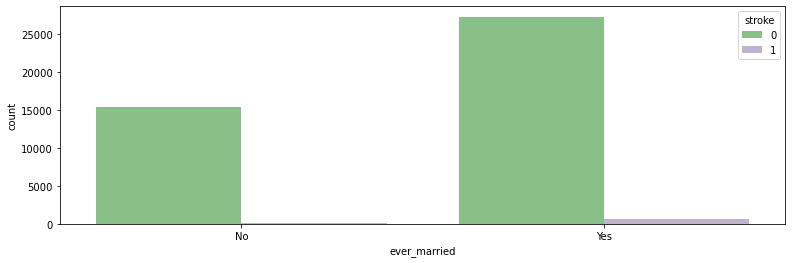

In [13]:
plt.figure(figsize=(13,4))
sns.countplot(Cerebral_Stroke["ever_married"],hue="stroke",data=Cerebral_Stroke,palette="Accent")
plt.show()

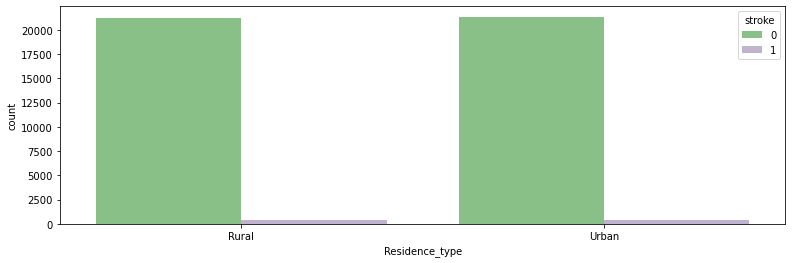

In [14]:
plt.figure(figsize=(13,4))
sns.countplot(Cerebral_Stroke["Residence_type"],hue="stroke",data=Cerebral_Stroke,palette="Accent")
plt.show()

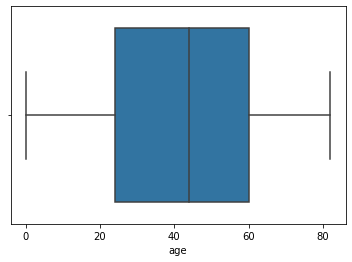

In [15]:
sns.boxplot(Cerebral_Stroke["age"])
plt.show()

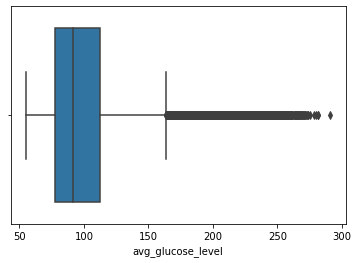

In [16]:
sns.boxplot(Cerebral_Stroke["avg_glucose_level"])
plt.show()

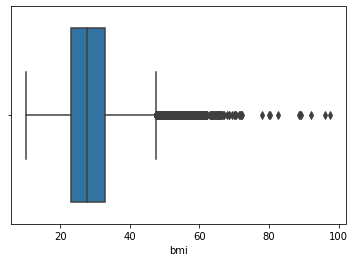

In [17]:
sns.boxplot(Cerebral_Stroke["bmi"])
plt.show()

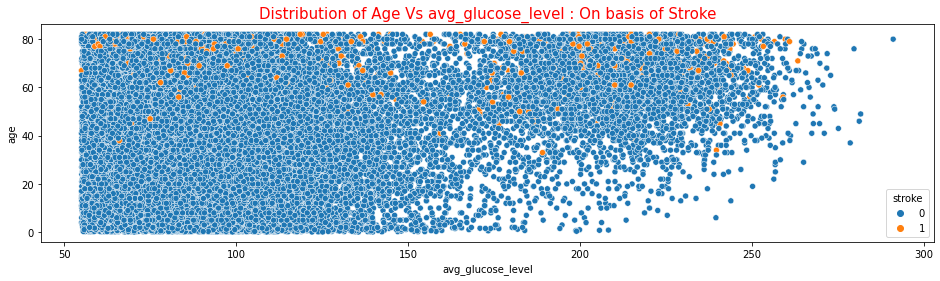

In [18]:
plt.figure(figsize=(16,4))
sns.scatterplot(Cerebral_Stroke["avg_glucose_level"],Cerebral_Stroke["age"],hue=Cerebral_Stroke["stroke"])
plt.title("Distribution of Age Vs avg_glucose_level : On basis of Stroke",fontsize=15,color="Red")
plt.show()

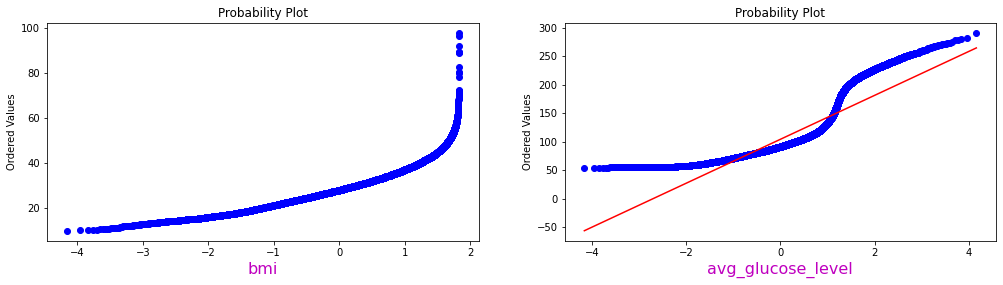

In [19]:
#bmi and avg_glucose_level have outliers
plt.figure(figsize=(17,4))

plt.subplot(121)
res=stats.probplot(Cerebral_Stroke.bmi,plot=plt,dist="norm")
plt.xlabel("bmi",fontsize=16,color="m")

plt.subplot(122)
res=stats.probplot(Cerebral_Stroke.avg_glucose_level,plot=plt,dist="norm")
plt.xlabel("avg_glucose_level",fontsize=16,color="m")

plt.show()

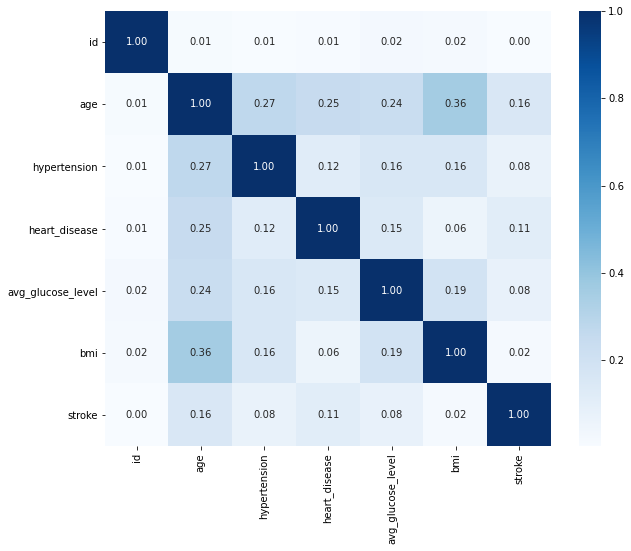

In [20]:
plt.figure(figsize=(10,8))
sns.heatmap(Cerebral_Stroke.corr(),cmap="Blues",annot=True,fmt='.2f')
plt.show()

In [21]:
#removing values those are greater then 60
Cerebral_Stroke=Cerebral_Stroke[Cerebral_Stroke['bmi'] < 60]

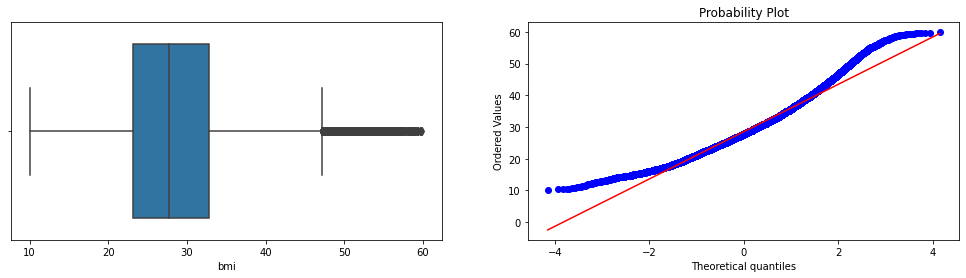

In [22]:
plt.figure(figsize=(17,4))

plt.subplot(121)
sns.boxplot(Cerebral_Stroke.bmi)

plt.subplot(122)
res=stats.probplot(Cerebral_Stroke.bmi,plot=plt,dist="norm")

In [23]:
#removing values those are greater then 270
Cerebral_Stroke=Cerebral_Stroke[Cerebral_Stroke['avg_glucose_level'] < 270]

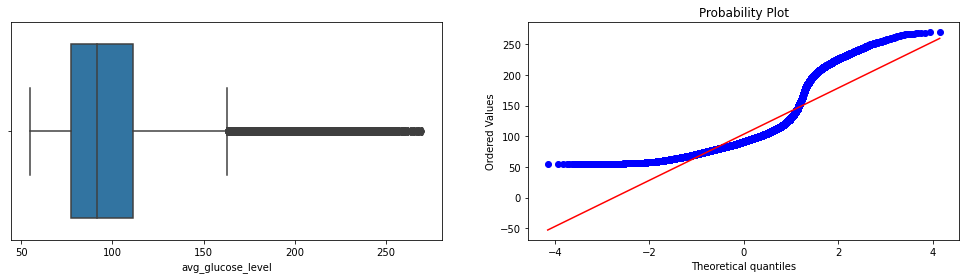

In [24]:
plt.figure(figsize=(17,4))

plt.subplot(121)
sns.boxplot(Cerebral_Stroke.avg_glucose_level)

plt.subplot(122)
res=stats.probplot(Cerebral_Stroke.avg_glucose_level,plot=plt,dist="norm")

In [25]:
numerical_columns=['age','hypertension','heart_disease','avg_glucose_level','bmi']

#### imputing missing values

In [26]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan,
                        strategy ='mean')
Cerebral_Stroke[numerical_columns]=imputer.fit_transform(Cerebral_Stroke[numerical_columns])

In [27]:
column=Cerebral_Stroke['smoking_status'].values.reshape(-1,1)
column.shape

(41836, 1)

In [28]:
imputer = SimpleImputer(missing_values = np.nan,
                        strategy ='most_frequent')
Cerebral_Stroke['smoking_status']=imputer.fit_transform(column)

In [29]:
Cerebral_Stroke.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41836 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 41836 non-null  int64  
 1   gender             41836 non-null  object 
 2   age                41836 non-null  float64
 3   hypertension       41836 non-null  float64
 4   heart_disease      41836 non-null  float64
 5   ever_married       41836 non-null  object 
 6   work_type          41836 non-null  object 
 7   Residence_type     41836 non-null  object 
 8   avg_glucose_level  41836 non-null  float64
 9   bmi                41836 non-null  float64
 10  smoking_status     41836 non-null  object 
 11  stroke             41836 non-null  int64  
dtypes: float64(5), int64(2), object(5)
memory usage: 4.1+ MB


In [30]:
Cerebral_Stroke.drop(columns={"id"},inplace=True,axis=1)

In [31]:
from sklearn.preprocessing import LabelEncoder

In [32]:
labels=["gender","ever_married","work_type","Residence_type","smoking_status"]
label=LabelEncoder()

for i in labels:
    Cerebral_Stroke[i]=label.fit_transform(Cerebral_Stroke[i])

In [33]:
#dataset after using LabelEncoder
Cerebral_Stroke

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,3.0,0.0,0.0,0,4,0,95.12,18.0,1,0
1,1,58.0,1.0,0.0,1,2,1,87.96,39.2,1,0
2,0,8.0,0.0,0.0,0,2,1,110.89,17.6,1,0
3,0,70.0,0.0,0.0,1,2,0,69.04,35.9,0,0
4,1,14.0,0.0,0.0,0,1,0,161.28,19.1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
43395,0,10.0,0.0,0.0,0,4,1,58.64,20.4,1,0
43396,0,56.0,0.0,0.0,1,0,1,213.61,55.4,0,0
43397,0,82.0,1.0,0.0,1,2,1,91.94,28.9,0,0
43398,1,40.0,0.0,0.0,1,2,1,99.16,33.2,1,0


In [34]:
#corr of the 
Cerebral_Stroke.corr()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
gender,1.000000,-0.032042,0.022068,0.079882,-0.034740,0.067270,0.003375,0.032122,-0.021649,-0.010193,0.009772
age,-0.032042,1.000000,0.268915,0.243119,0.694558,-0.371445,0.000888,0.232051,0.368386,-0.115379,0.147750
hypertension,0.022068,0.268915,1.000000,0.121551,0.173040,-0.060534,-0.000661,0.158101,0.158677,-0.033801,0.079379
heart_disease,0.079882,0.243119,0.121551,1.000000,0.123941,-0.021341,-0.003928,0.143226,0.059931,-0.033904,0.110479
ever_married,-0.034740,0.694558,0.173040,0.123941,1.000000,-0.362888,0.004836,0.147977,0.349754,-0.050223,0.066865
work_type,0.067270,-0.371445,-0.060534,-0.021341,-0.362888,1.000000,-0.003113,-0.056386,-0.330460,-0.012213,-0.011839
Residence_type,0.003375,0.000888,-0.000661,-0.003928,0.004836,-0.003113,1.000000,-0.000500,-0.003360,0.010171,0.002490
avg_glucose_level,0.032122,0.232051,0.158101,0.143226,0.147977,-0.056386,-0.000500,1.000000,0.192110,-0.035923,0.077132
bmi,-0.021649,0.368386,0.158677,0.059931,0.349754,-0.330460,-0.003360,0.192110,1.000000,-0.037654,0.022188
smoking_status,-0.010193,-0.115379,-0.033801,-0.033904,-0.050223,-0.012213,0.010171,-0.035923,-0.037654,1.000000,-0.019172


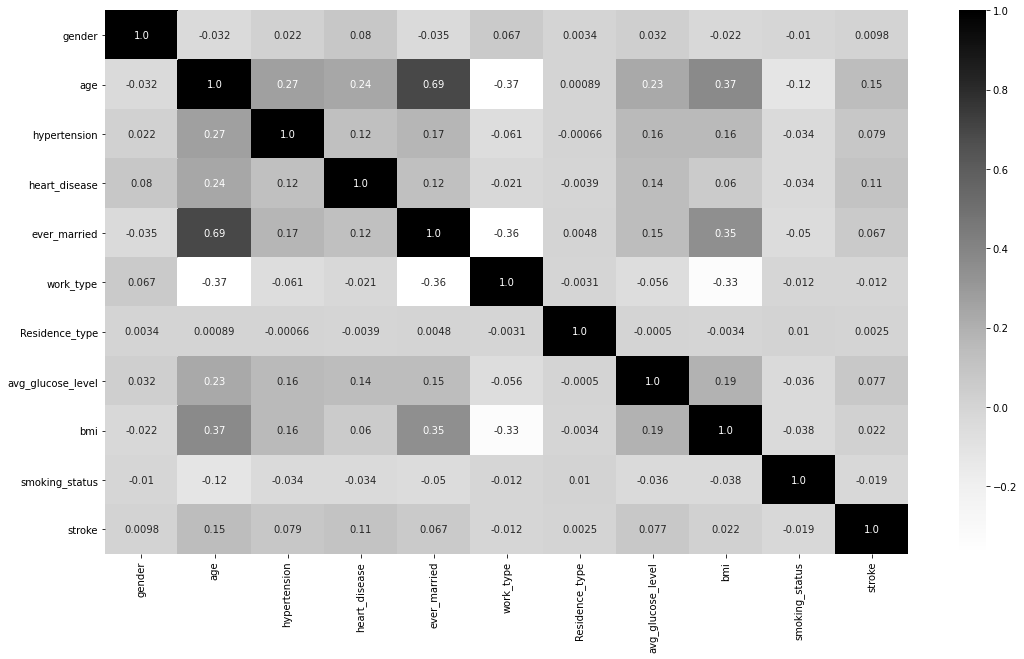

In [35]:
plt.figure(figsize=(18,10))
sns.heatmap(Cerebral_Stroke.corr(),annot=True,fmt='.2',cmap="Greys")
plt.show()

#### Dummy Variables

In [36]:
dummy_data=pd.get_dummies(Cerebral_Stroke,columns={"gender","ever_married","work_type",
                                                   "Residence_type","smoking_status"},drop_first=True)

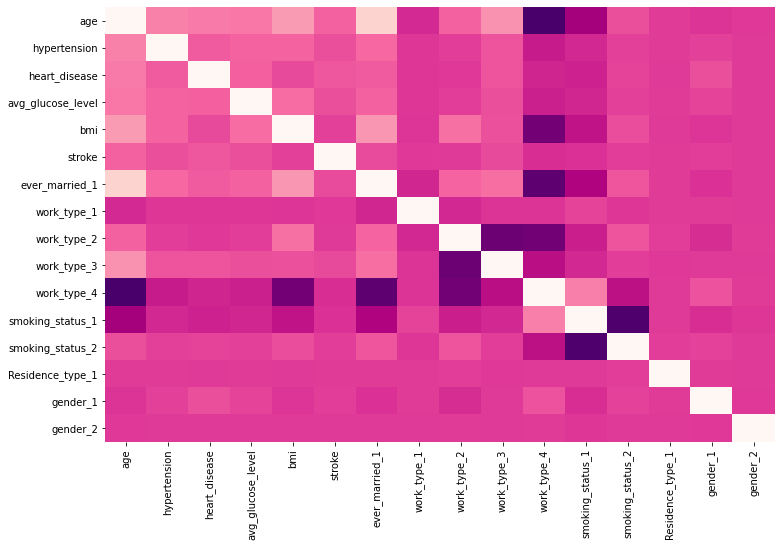

In [37]:
#checking the correlation of the new dataset
plt.figure(figsize=(12,8))
sns.heatmap(dummy_data.corr(),fmt='.2',cbar=False,cmap="RdPu_r")
plt.show()

In [38]:
dummy_data.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,ever_married_1,work_type_1,work_type_2,work_type_3,work_type_4,smoking_status_1,smoking_status_2,Residence_type_1,gender_1,gender_2
0,3.0,0.0,0.0,95.12,18.0,0,0,0,0,0,1,1,0,0,1,0
1,58.0,1.0,0.0,87.96,39.2,0,1,0,1,0,0,1,0,1,1,0
2,8.0,0.0,0.0,110.89,17.6,0,0,0,1,0,0,1,0,1,0,0
3,70.0,0.0,0.0,69.04,35.9,0,1,0,1,0,0,0,0,0,0,0
4,14.0,0.0,0.0,161.28,19.1,0,0,1,0,0,0,1,0,0,1,0


In [39]:
da=dummy_data.copy()

## Train and Test Data Split

In [40]:
x = da.drop(['stroke'], axis=1)
y = da['stroke']
# Splitting the data into train and test
X_train,X_test,y_train,y_test=train_test_split(x, y, train_size=0.8, stratify = y, random_state=100)

In [41]:
y_train.shape, y_test.shape

((33468,), (8368,))

In [42]:
y_train.value_counts()/len(y_train)

0    0.984642
1    0.015358
Name: stroke, dtype: float64

In [43]:
    y_test.value_counts()/len(y_test)

0    0.984704
1    0.015296
Name: stroke, dtype: float64

In [44]:
from sklearn.preprocessing import StandardScaler
Scaler_X = StandardScaler()
X_train = Scaler_X.fit_transform(X_train)
X_test = Scaler_X.transform(X_test)

# Resampling techniques to handel class imbalance

## 1. Oversampling

### 1.1 Random Oversampling

In [45]:
from imblearn.over_sampling import RandomOverSampler

counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using Random Over Sampling
ros = RandomOverSampler()
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

counter = Counter(y_train_ros)
print('After',counter)

Before Counter({0: 32954, 1: 514})
After Counter({0: 32954, 1: 32954})


### 1.2 SMOTE

In [46]:
#K Means SMOTE
#library for perfroming SMOTE
from imblearn.over_sampling import SMOTE

In [47]:
# counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using SMOTE
smt = SMOTE()
X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)

counter = Counter(y_train_sm)
print('After',counter)

Before Counter({0: 32954, 1: 32954})
After Counter({0: 32954, 1: 32954})


### 1.3 ADASYN

In [48]:
from imblearn.over_sampling import ADASYN

counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using ADASYN
ada = ADASYN()
X_train_ada, y_train_ada = ada.fit_resample(X_train, y_train)

counter = Counter(y_train_ada)
print('After',counter)

Before Counter({0: 32954, 1: 514})
After Counter({0: 32954, 1: 32787})


## 2. Undersampling

### 2.1 Random Undersampling

In [49]:
from imblearn.under_sampling import RandomUnderSampler

counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using Random Under Sampling
rus = RandomUnderSampler()
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

counter = Counter(y_train_rus)
print('After',counter)

Before Counter({0: 32954, 1: 514})
After Counter({0: 514, 1: 514})


### 2.2 Tomek Links

In [50]:
from imblearn.under_sampling import TomekLinks

counter = Counter(y_train)
print('Before',counter)
# undersampling the train dataset using TomekLinks
toml = TomekLinks()
X_train_toml, y_train_toml = toml.fit_resample(X_train, y_train)

counter = Counter(y_train_toml)
print('After',counter)

Before Counter({0: 32954, 1: 514})
After Counter({0: 32683, 1: 514})


### 2.3 Near Miss

In [51]:
from imblearn.under_sampling import NearMiss

counter = Counter(y_train)
print('Before',counter)
# undersampling the train dataset using Near Miss
nm = NearMiss()
X_train_nm, y_train_nm = nm.fit_resample(X_train, y_train)

counter = Counter(y_train_nm)
print('After',counter)

Before Counter({0: 32954, 1: 514})
After Counter({0: 514, 1: 514})


## 3. Hybrid Techniques

### 3.1 SMOTE + Tomek Links

In [52]:
from imblearn.combine import SMOTETomek

counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using SMOTE + Tomek
smtom = SMOTETomek(random_state=139)
X_train_smtom, y_train_smtom = smtom.fit_resample(X_train, y_train)

counter = Counter(y_train_smtom)
print('After',counter)

Before Counter({0: 32954, 1: 514})
After Counter({0: 32780, 1: 32780})


### 3.2 SMOTE + ENN

In [53]:
from imblearn.combine import SMOTEENN

counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using SMOTE + ENN
smenn = SMOTEENN()
X_train_smenn, y_train_smenn = smenn.fit_resample(X_train, y_train)

counter = Counter(y_train_smenn)
print('After',counter)

Before Counter({0: 32954, 1: 514})
After Counter({1: 31585, 0: 29315})


# Visualizing Resampled Data

In [54]:
from sklearn.datasets import make_classification
X, Y = make_classification(n_samples=20000, n_features=2, n_informative=2,
                            n_redundant=0, n_repeated=0, n_classes=2,
                            n_clusters_per_class=1,
                            weights=[0.95, 0.05],
                            class_sep=0.8, random_state=100)
X1, X2 = list(), list()
for i, j in enumerate(X):
    X1.append(j[0])
    X2.append(j[1])
df = pd.DataFrame({'X1':X1, 'X2':X2, 'Y':Y})
pal = sns.color_palette('tab10')
print(pal.as_hex())

['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


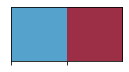

In [55]:
#sns.set_palette('icefire')
sns.set_palette(['#55a3cd', '#9c2f45'])
sns.palplot(sns.color_palette())

# Imbalanced Data

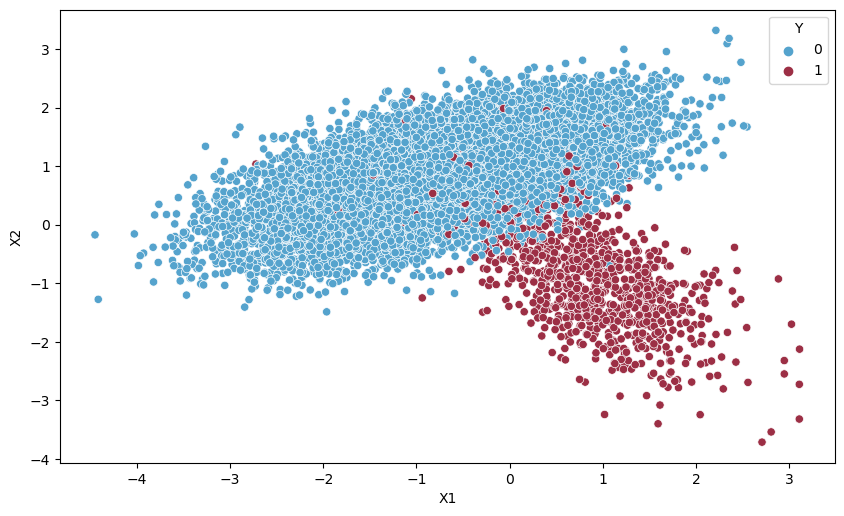

In [56]:
plt.figure(figsize=(10,6),dpi=100)

sns.despine(left=True)
sns.scatterplot(x='X1', y='X2', hue = 'Y', data=df)
plt.show()

In [57]:
df['Y'].value_counts()

0    18909
1     1091
Name: Y, dtype: int64

In [58]:
x = df.drop('Y', axis=1)
y = df['Y']

# With Resampling Techniques

In [59]:
counter = Counter(y)
ros = RandomOverSampler()
X_train1, y_train1 = ros.fit_resample(x, y)
counter = Counter(y_train1)
df_ros = X_train1.copy()
df_ros['Y'] = y_train1

counter = Counter(y)
smt = SMOTE()
X_train1, y_train1 = smt.fit_resample(x, y)
counter = Counter(y_train1)
df_sm = X_train1.copy()
df_sm['Y'] = y_train1

counter = Counter(y)
ada = ADASYN()
X_train1, y_train1 = ada.fit_resample(x, y)
counter = Counter(y_train1)
df_ada = X_train1.copy()
df_ada['Y'] = y_train1

counter = Counter(y)
rus = RandomUnderSampler()
X_train1, y_train1 = rus.fit_resample(x, y)
counter = Counter(y_train1)
df_rus = X_train1.copy()
df_rus['Y'] = y_train1

counter = Counter(y)
toml = TomekLinks()
X_train1, y_train1 = toml.fit_resample(x, y)
counter = Counter(y_train1)
df_toml = X_train1.copy()
df_toml['Y'] = y_train1

counter = Counter(y)
nm = NearMiss()
X_train1, y_train1 = nm.fit_resample(x, y)
counter = Counter(y_train1)
df_nm = X_train1.copy()
df_nm['Y'] = y_train1

counter = Counter(y)
smtom = SMOTETomek()
X_train1, y_train1 = smtom.fit_resample(x, y)
counter = Counter(y_train1)
df_smtom = X_train1.copy()
df_smtom['Y'] = y_train1

counter = Counter(y)
smenn = SMOTEENN()
X_train1, y_train1 = smenn.fit_resample(x, y)
counter = Counter(y_train1)
df_smenn = X_train1.copy()
df_smenn['Y'] = y_train1

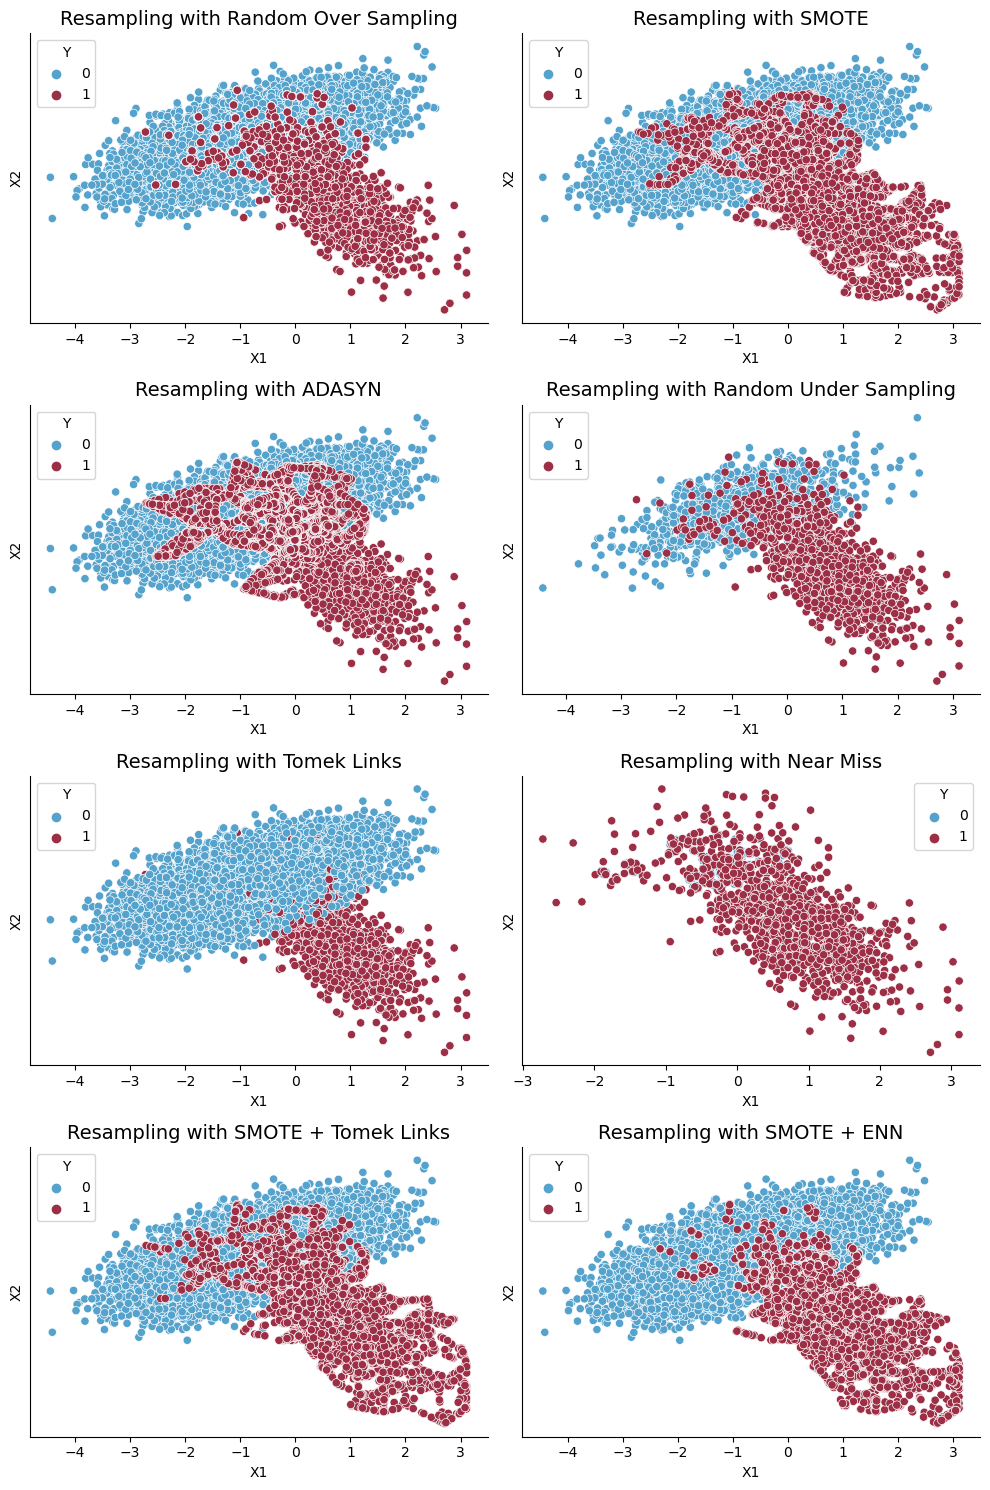

In [60]:
f, axes = plt.subplots(4,2,figsize=(10, 15), dpi=100)
sns.despine()
sns.scatterplot(x='X1', y='X2', hue = 'Y', data=df_ros, ax=axes[0,0])
axes[0,0].set_title('Resampling with Random Over Sampling', fontsize=14)
sns.scatterplot(x='X1', y='X2', hue = 'Y', data=df_sm, ax=axes[0,1])
axes[0,1].set_title('Resampling with SMOTE', fontsize=14)
sns.scatterplot(x='X1', y='X2', hue = 'Y', data=df_ada, ax=axes[1,0])
axes[1,0].set_title('Resampling with ADASYN', fontsize=14)
sns.scatterplot(x='X1', y='X2', hue = 'Y', data=df_rus, ax=axes[1,1])
axes[1,1].set_title('Resampling with Random Under Sampling', fontsize=14)
sns.scatterplot(x='X1', y='X2', hue = 'Y', data=df_toml, ax=axes[2,0])
axes[2,0].set_title('Resampling with Tomek Links', fontsize=14)
sns.scatterplot(x='X1', y='X2', hue = 'Y', data=df_nm, ax=axes[2,1])
axes[2,1].set_title('Resampling with Near Miss', fontsize=14)
sns.scatterplot(x='X1', y='X2', hue = 'Y', data=df_smtom, ax=axes[3,0])
axes[3,0].set_title('Resampling with SMOTE + Tomek Links', fontsize=14)
sns.scatterplot(x='X1', y='X2', hue = 'Y', data=df_smenn, ax=axes[3,1])
axes[3,1].set_title('Resampling with SMOTE + ENN', fontsize=14)
plt.setp(axes, yticks=[])
plt.tight_layout()
plt.show()

# Building Models

In [61]:
model = list()
resample = list()
precision = list()
recall = list()
F1score = list()
AUCROC = list()

from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report, precision_recall_curve
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV

In [63]:
def test_eval(clf_model, X_test, y_test, algo=None, sampling=None):
    # Test set prediction
    y_prob=clf_model.predict_proba(X_test)
    y_pred=clf_model.predict(X_test)

    print('Confusion Matrix')
    print('='*60)
    plot_confusion_matrix(clf_model, X_test, y_test)  
    plt.show()
    #print(confusion_matrix(y_test,y_pred),"\n")
    print('Classification Report')
    print('='*60)
    print(classification_report(y_test,y_pred),"\n")
    print('AUC-ROC')
    print('='*60)
    print(roc_auc_score(y_test, y_prob[:,1]))
          
    model.append(algo)
    precision.append(precision_score(y_test,y_pred))
    recall.append(recall_score(y_test,y_pred))
    F1score.append(f1_score(y_test,y_pred))
    AUCROC.append(roc_auc_score(y_test, y_prob[:,1]))
    resample.append(sampling)

# Model-1: Logistic Regression

# 1. Original Unsampled Data

In [64]:
log_model=LogisticRegression()

params={'C':np.logspace(-10, 1, 15),'class_weight':[None,'balanced'],'penalty':['l1','l2']}

cv = StratifiedKFold(n_splits=5, random_state=100, shuffle=True)

# Create grid search using 5-fold cross validation
clf_LR = GridSearchCV(log_model, params, cv=cv, scoring='roc_auc', n_jobs=-1)
clf_LR.fit(X_train, y_train)
clf_LR.best_estimator_

LogisticRegression(C=0.04393970560760786)

Confusion Matrix


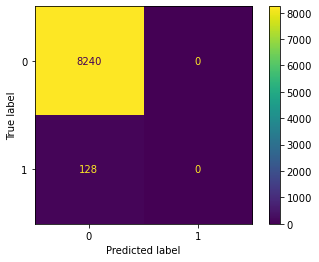

Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      8240
           1       0.00      0.00      0.00       128

    accuracy                           0.98      8368
   macro avg       0.49      0.50      0.50      8368
weighted avg       0.97      0.98      0.98      8368
 

AUC-ROC
0.8667930825242718


In [65]:
test_eval(clf_LR, X_test, y_test, 'Logistic Regression', 'actual')

# 2. Random Over Resampling

In [66]:
clf_LR.fit(X_train_ros, y_train_ros)
clf_LR.best_estimator_

LogisticRegression(C=0.007196856730011514, class_weight='balanced')

Confusion Matrix


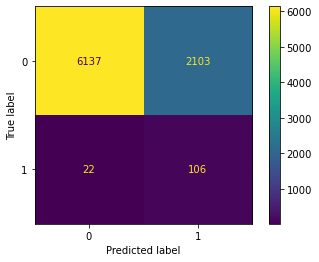

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.74      0.85      8240
           1       0.05      0.83      0.09       128

    accuracy                           0.75      8368
   macro avg       0.52      0.79      0.47      8368
weighted avg       0.98      0.75      0.84      8368
 

AUC-ROC
0.8645915503640776


In [67]:
test_eval(clf_LR, X_test, y_test, 'Logistic Regression', 'random os')

### 3. SMOTE Resampling

In [68]:
clf_LR.fit(X_train_sm, y_train_sm)
clf_LR.best_estimator_

LogisticRegression(C=0.0011787686347935866)

Confusion Matrix


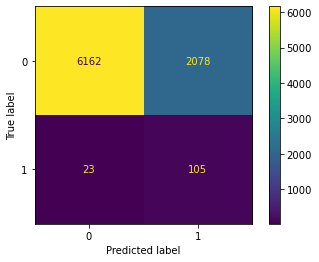

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.75      0.85      8240
           1       0.05      0.82      0.09       128

    accuracy                           0.75      8368
   macro avg       0.52      0.78      0.47      8368
weighted avg       0.98      0.75      0.84      8368
 

AUC-ROC
0.8665105430825243


In [69]:
test_eval(clf_LR, X_test, y_test, 'Logistic Regression', 'smote')

### 4. ADASYN Resampling

In [70]:
clf_LR.fit(X_train_ada, y_train_ada)
clf_LR.best_estimator_

LogisticRegression(C=0.0011787686347935866)

Confusion Matrix


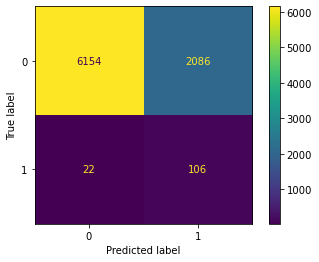

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.75      0.85      8240
           1       0.05      0.83      0.09       128

    accuracy                           0.75      8368
   macro avg       0.52      0.79      0.47      8368
weighted avg       0.98      0.75      0.84      8368
 

AUC-ROC
0.8663645327669903


In [71]:
test_eval(clf_LR, X_test, y_test, 'Logistic Regression', 'adasyn')

### 5. Random Under Resampling


In [72]:
clf_LR.fit(X_train_rus, y_train_rus)
clf_LR.best_estimator_

LogisticRegression(C=0.26826957952797276)

Confusion Matrix


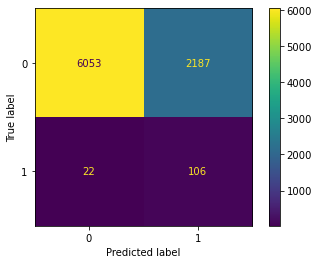

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.73      0.85      8240
           1       0.05      0.83      0.09       128

    accuracy                           0.74      8368
   macro avg       0.52      0.78      0.47      8368
weighted avg       0.98      0.74      0.83      8368
 

AUC-ROC
0.86176994842233


In [73]:
test_eval(clf_LR, X_test, y_test, 'Logistic Regression', 'random us')

### 6. Tomek Links Resampling

In [74]:
clf_LR.fit(X_train_toml, y_train_toml)
clf_LR.best_estimator_

LogisticRegression(C=0.007196856730011514, class_weight='balanced')

Confusion Matrix


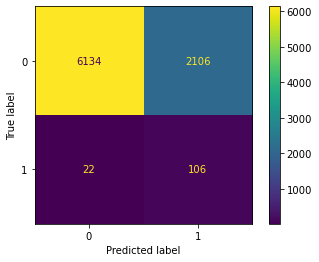

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.74      0.85      8240
           1       0.05      0.83      0.09       128

    accuracy                           0.75      8368
   macro avg       0.52      0.79      0.47      8368
weighted avg       0.98      0.75      0.84      8368
 

AUC-ROC
0.8647005840412623


In [75]:
test_eval(clf_LR, X_test, y_test, 'Logistic Regression', 'tomek links')

### 7. Near Miss Resampling

In [76]:
clf_LR.fit(X_train_nm, y_train_nm)
clf_LR.best_estimator_

LogisticRegression(C=10.0)

Confusion Matrix


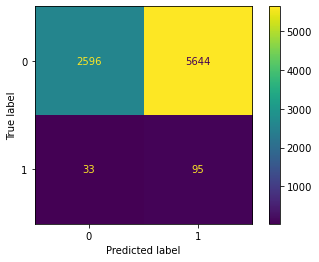

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.32      0.48      8240
           1       0.02      0.74      0.03       128

    accuracy                           0.32      8368
   macro avg       0.50      0.53      0.26      8368
weighted avg       0.97      0.32      0.47      8368
 

AUC-ROC
0.5043158373786407


In [77]:
test_eval(clf_LR, X_test, y_test, 'Logistic Regression', 'near miss')

### 8. SMOTE + Tomek Resampling

In [78]:
clf_LR.fit(X_train_smtom, y_train_smtom)
clf_LR.best_estimator_

LogisticRegression(C=0.0011787686347935866)

Confusion Matrix


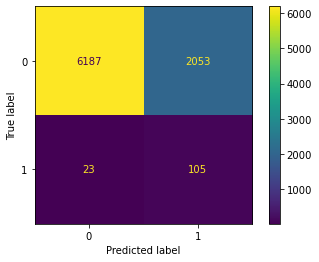

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.75      0.86      8240
           1       0.05      0.82      0.09       128

    accuracy                           0.75      8368
   macro avg       0.52      0.79      0.47      8368
weighted avg       0.98      0.75      0.84      8368
 

AUC-ROC
0.8668404884708737


In [79]:
test_eval(clf_LR, X_test, y_test, 'Logistic Regression', 'smote+tomek')

### 9. SMOTE + ENN Resampling

In [80]:
clf_LR.fit(X_train_smenn, y_train_smenn)
clf_LR.best_estimator_

LogisticRegression(C=0.007196856730011514, class_weight='balanced')

Confusion Matrix


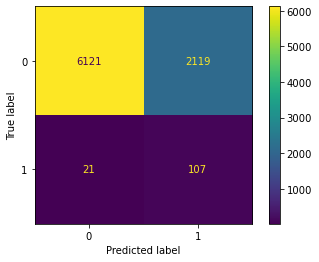

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.74      0.85      8240
           1       0.05      0.84      0.09       128

    accuracy                           0.74      8368
   macro avg       0.52      0.79      0.47      8368
weighted avg       0.98      0.74      0.84      8368
 

AUC-ROC
0.8674738319174757


In [81]:
test_eval(clf_LR, X_test, y_test, 'Logistic Regression', 'smote+enn')

# Model-2: Decision Tree

In [82]:
estimators = [2,10,30,50,100]
# Maximum number of depth in each tree:
max_depth = [i for i in range(5,16,2)]
# Minimum number of samples to consider to split a node:
min_samples_split = [2, 5, 10, 15, 20, 50, 100]
# Minimum number of samples to consider at each leaf node:
min_samples_leaf = [1, 2, 5]

### 1. Original Unsampled Data

In [83]:
tree_model = DecisionTreeClassifier()

tree_param_grid = { 
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
}

clf_DT = RandomizedSearchCV(tree_model, tree_param_grid, cv=cv, scoring='roc_auc', n_jobs=-1, verbose=2)
clf_DT.fit(X_train, y_train)
clf_DT.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


DecisionTreeClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=20)

Confusion Matrix


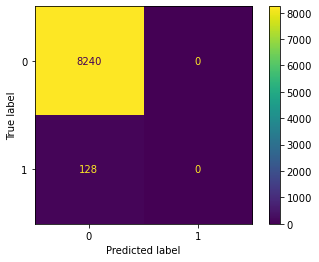

Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      8240
           1       0.00      0.00      0.00       128

    accuracy                           0.98      8368
   macro avg       0.49      0.50      0.50      8368
weighted avg       0.97      0.98      0.98      8368
 

AUC-ROC
0.8537810983009709


In [84]:
test_eval(clf_DT, X_test, y_test, 'Decision Tree', 'actual')

### 2. Random Over Resampling

In [85]:
clf_DT.fit(X_train_ros, y_train_ros)
clf_DT.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


DecisionTreeClassifier(max_depth=15, min_samples_split=10)

Confusion Matrix


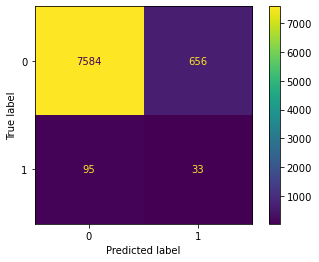

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.92      0.95      8240
           1       0.05      0.26      0.08       128

    accuracy                           0.91      8368
   macro avg       0.52      0.59      0.52      8368
weighted avg       0.97      0.91      0.94      8368
 

AUC-ROC
0.5883348187196603


In [86]:
test_eval(clf_DT, X_test, y_test, 'Decision Tree', 'random os')

### 3. SMOTE Resampling

In [87]:
clf_DT.fit(X_train_sm, y_train_sm)
clf_DT.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


DecisionTreeClassifier(max_depth=11)

Confusion Matrix


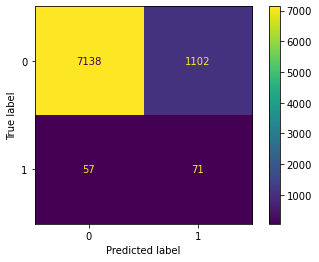

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.87      0.92      8240
           1       0.06      0.55      0.11       128

    accuracy                           0.86      8368
   macro avg       0.53      0.71      0.52      8368
weighted avg       0.98      0.86      0.91      8368
 

AUC-ROC
0.7567231113470874


In [88]:
test_eval(clf_DT, X_test, y_test, 'Decision Tree', 'smote')

### 4. ADASYN Resampling

In [89]:
clf_DT.fit(X_train_ada, y_train_ada)
clf_DT.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


DecisionTreeClassifier(max_depth=13, min_samples_leaf=5, min_samples_split=10)

Confusion Matrix


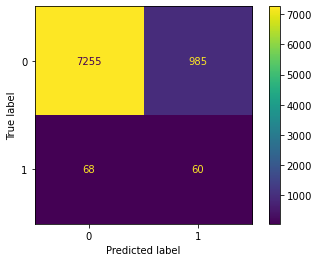

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.88      0.93      8240
           1       0.06      0.47      0.10       128

    accuracy                           0.87      8368
   macro avg       0.52      0.67      0.52      8368
weighted avg       0.98      0.87      0.92      8368
 

AUC-ROC
0.7066600614381068


In [90]:
test_eval(clf_DT, X_test, y_test, 'Decision Tree', 'adasyn')

### 5. Random Under Resampling

In [91]:
clf_DT.fit(X_train_rus, y_train_rus)
clf_DT.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


DecisionTreeClassifier(max_depth=15, min_samples_leaf=2, min_samples_split=100)

Confusion Matrix


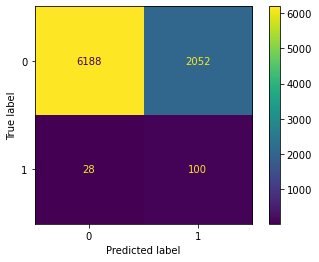

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.75      0.86      8240
           1       0.05      0.78      0.09       128

    accuracy                           0.75      8368
   macro avg       0.52      0.77      0.47      8368
weighted avg       0.98      0.75      0.84      8368
 

AUC-ROC
0.8359977055521844


In [92]:
test_eval(clf_DT, X_test, y_test, 'Decision Tree', 'random us')

### 6. Tomek Links Resampling

In [93]:
clf_DT.fit(X_train_toml, y_train_toml)
clf_DT.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


DecisionTreeClassifier(max_depth=5, min_samples_split=100)

Confusion Matrix


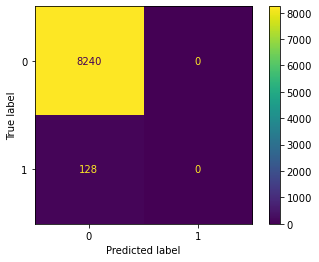

Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      8240
           1       0.00      0.00      0.00       128

    accuracy                           0.98      8368
   macro avg       0.49      0.50      0.50      8368
weighted avg       0.97      0.98      0.98      8368
 

AUC-ROC
0.8529993742415048


In [94]:
test_eval(clf_DT, X_test, y_test, 'Decision Tree', 'tomek links')

### 7. Near Miss Resampling

In [95]:
clf_DT.fit(X_train_nm, y_train_nm)
clf_DT.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


DecisionTreeClassifier(max_depth=11, min_samples_leaf=2, min_samples_split=50)

Confusion Matrix


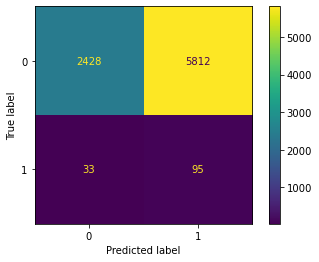

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.29      0.45      8240
           1       0.02      0.74      0.03       128

    accuracy                           0.30      8368
   macro avg       0.50      0.52      0.24      8368
weighted avg       0.97      0.30      0.45      8368
 

AUC-ROC
0.5036004816444175


In [96]:
test_eval(clf_DT, X_test, y_test, 'Decision Tree', 'near miss')

### 8. SMOTE + Tomek Resampling

In [97]:
clf_DT.fit(X_train_smtom, y_train_smtom)
clf_DT.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


DecisionTreeClassifier(max_depth=13, min_samples_leaf=2, min_samples_split=5)

Confusion Matrix


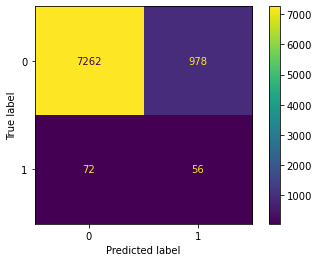

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.88      0.93      8240
           1       0.05      0.44      0.10       128

    accuracy                           0.87      8368
   macro avg       0.52      0.66      0.51      8368
weighted avg       0.98      0.87      0.92      8368
 

AUC-ROC
0.6974045244235436


In [98]:
test_eval(clf_DT, X_test, y_test, 'Decision Tree', 'smote+tomek')

### 9. SMOTE + ENN Resampling

In [99]:
clf_DT.fit(X_train_smenn, y_train_smenn)
clf_DT.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


DecisionTreeClassifier(max_depth=15, min_samples_leaf=2, min_samples_split=15)

Confusion Matrix


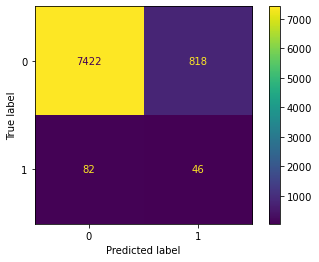

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.90      0.94      8240
           1       0.05      0.36      0.09       128

    accuracy                           0.89      8368
   macro avg       0.52      0.63      0.52      8368
weighted avg       0.97      0.89      0.93      8368
 

AUC-ROC
0.6774433024878641


In [100]:
test_eval(clf_DT, X_test, y_test, 'Decision Tree', 'smote+enn')

# Model-3: Random Forest

### 1. Original Unsampled Data

In [101]:
rf_model = RandomForestClassifier()

rf_params={'n_estimators':estimators,
           'max_depth':max_depth,
           'min_samples_split':min_samples_split}

clf_RF = RandomizedSearchCV(rf_model, rf_params, cv=cv, scoring='roc_auc', n_jobs=-1, n_iter=20, verbose=2)
clf_RF.fit(X_train, y_train)
clf_RF.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomForestClassifier(max_depth=7, min_samples_split=10, n_estimators=30)

Confusion Matrix


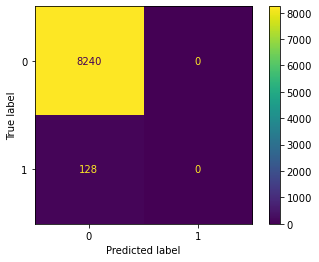

Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      8240
           1       0.00      0.00      0.00       128

    accuracy                           0.98      8368
   macro avg       0.49      0.50      0.50      8368
weighted avg       0.97      0.98      0.98      8368
 

AUC-ROC
0.8580007016080097


In [102]:
test_eval(clf_RF, X_test, y_test, 'Random Forest', 'actual')

### 2. Random Over Resampling

In [103]:
clf_RF.fit(X_train_ros, y_train_ros)
clf_RF.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomForestClassifier(max_depth=15, min_samples_split=15, n_estimators=50)

Confusion Matrix


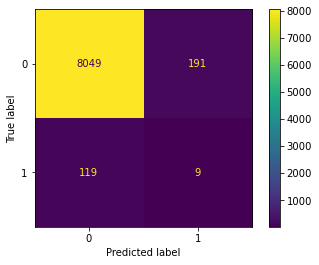

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      8240
           1       0.04      0.07      0.05       128

    accuracy                           0.96      8368
   macro avg       0.52      0.52      0.52      8368
weighted avg       0.97      0.96      0.97      8368
 

AUC-ROC
0.7846238812196602


In [104]:
test_eval(clf_RF, X_test, y_test, 'Random Forest', 'random os')

### 3. SMOTE Resampling

In [105]:
clf_RF.fit(X_train_sm, y_train_sm)
clf_RF.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomForestClassifier(max_depth=15, min_samples_split=10, n_estimators=50)

Confusion Matrix


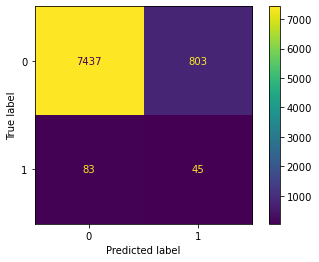

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.90      0.94      8240
           1       0.05      0.35      0.09       128

    accuracy                           0.89      8368
   macro avg       0.52      0.63      0.52      8368
weighted avg       0.97      0.89      0.93      8368
 

AUC-ROC
0.7912920016686893


In [106]:
test_eval(clf_RF, X_test, y_test, 'Random Forest', 'smote')

### 4. ADASYN Resampling

In [107]:
clf_RF.fit(X_train_ada, y_train_ada)
clf_RF.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomForestClassifier(max_depth=15, min_samples_split=20, n_estimators=50)

Confusion Matrix


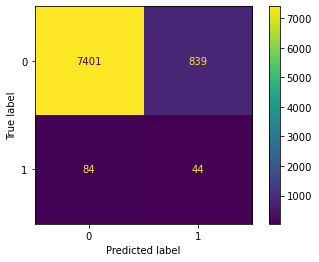

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.90      0.94      8240
           1       0.05      0.34      0.09       128

    accuracy                           0.89      8368
   macro avg       0.52      0.62      0.51      8368
weighted avg       0.97      0.89      0.93      8368
 

AUC-ROC
0.796239286256068


In [108]:
test_eval(clf_RF, X_test, y_test, 'Random Forest', 'adasyn')

### 5. Random Under Resampling

In [109]:
clf_RF.fit(X_train_rus, y_train_rus)
clf_RF.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomForestClassifier(max_depth=5, min_samples_split=5)

Confusion Matrix


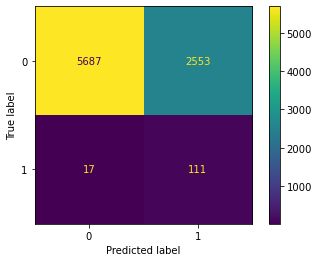

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.69      0.82      8240
           1       0.04      0.87      0.08       128

    accuracy                           0.69      8368
   macro avg       0.52      0.78      0.45      8368
weighted avg       0.98      0.69      0.80      8368
 

AUC-ROC
0.856082182949029


In [110]:
test_eval(clf_RF, X_test, y_test, 'Random Forest', 'random us')

### 6. Tomek Links Resampling

In [111]:
clf_RF.fit(X_train_toml, y_train_toml)
clf_RF.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomForestClassifier(max_depth=5)

Confusion Matrix


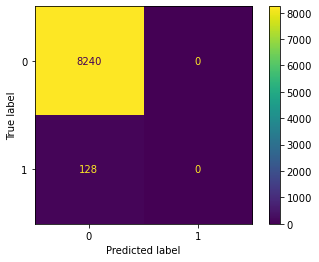

Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      8240
           1       0.00      0.00      0.00       128

    accuracy                           0.98      8368
   macro avg       0.49      0.50      0.50      8368
weighted avg       0.97      0.98      0.98      8368
 

AUC-ROC
0.8625037924757282


In [112]:
test_eval(clf_RF, X_test, y_test, 'Random Forest', 'tomek links')

### 7. Near Miss Resampling

In [113]:
clf_RF.fit(X_train_nm, y_train_nm)
clf_RF.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomForestClassifier(max_depth=9, min_samples_split=5)

Confusion Matrix


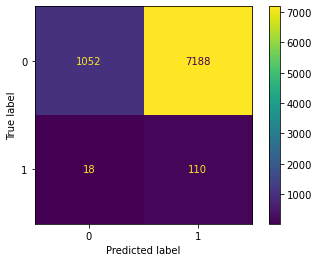

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.13      0.23      8240
           1       0.02      0.86      0.03       128

    accuracy                           0.14      8368
   macro avg       0.50      0.49      0.13      8368
weighted avg       0.97      0.14      0.22      8368
 

AUC-ROC
0.5150584989381068


In [114]:
test_eval(clf_RF, X_test, y_test, 'Random Forest', 'near miss')

### 8. SMOTE + Tomek Resampling

In [115]:
clf_RF.fit(X_train_smtom, y_train_smtom)
clf_RF.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomForestClassifier(max_depth=15, n_estimators=10)

Confusion Matrix


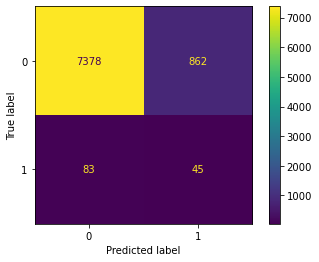

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.90      0.94      8240
           1       0.05      0.35      0.09       128

    accuracy                           0.89      8368
   macro avg       0.52      0.62      0.51      8368
weighted avg       0.97      0.89      0.93      8368
 

AUC-ROC
0.7773006105885922


In [116]:
test_eval(clf_RF, X_test, y_test, 'Random Forest', 'smote+tomek')

### 9. SMOTE + ENN Resampling

In [117]:
clf_RF.fit(X_train_smenn, y_train_smenn)
clf_RF.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomForestClassifier(max_depth=15, min_samples_split=20, n_estimators=50)

Confusion Matrix


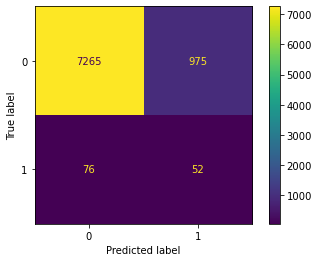

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.88      0.93      8240
           1       0.05      0.41      0.09       128

    accuracy                           0.87      8368
   macro avg       0.52      0.64      0.51      8368
weighted avg       0.98      0.87      0.92      8368
 

AUC-ROC
0.806420187348301


In [118]:
test_eval(clf_RF, X_test, y_test, 'Random Forest', 'smote+enn')

# Comparitive Analysis

In [119]:
clf_eval_df = pd.DataFrame({'model':model,
                            'resample':resample,
                            'precision':precision,
                            'recall':recall,
                            'f1-score':F1score,
                            'AUC-ROC':AUCROC})

In [120]:
clf_eval_df

,model,resample,precision,recall,f1-score,AUC-ROC
0,Logistic Regression,actual,0.000000,0.000000,0.000000,0.866793
1,Logistic Regression,random os,0.047986,0.828125,0.090715,0.864592
2,Logistic Regression,smote,0.048099,0.820312,0.090870,0.866511
3,Logistic Regression,adasyn,0.048358,0.828125,0.091379,0.866365
4,Logistic Regression,random us,0.046228,0.828125,0.087567,0.861770
5,Logistic Regression,tomek links,0.047920,0.828125,0.090598,0.864701
6,Logistic Regression,near miss,0.016553,0.742188,0.032385,0.504316
7,Logistic Regression,smote+tomek,0.048656,0.820312,0.091864,0.866840
8,Logistic Regression,smote+enn,0.048068,0.835938,0.090909,0.867474
9,Decision Tree,actual,0.000000,0.000000,0.000000,0.853781


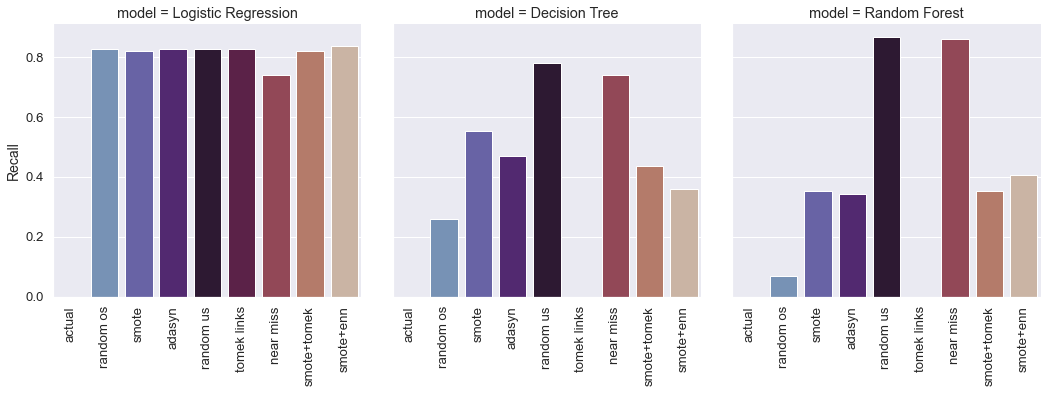

In [121]:
sns.set(font_scale=1.2)
#sns.palplot(sns.color_palette())
g = sns.FacetGrid(clf_eval_df, col="model", height=5)
g.map(sns.barplot, "resample", "recall", palette='twilight', order=["actual", "random os", "smote", "adasyn", "random us", "tomek links", "near miss", "smote+tomek", "smote+enn"])
g.set_xticklabels(rotation=90)
g.set_xlabels(' ', fontsize=14)
g.set_ylabels('Recall', fontsize=14)

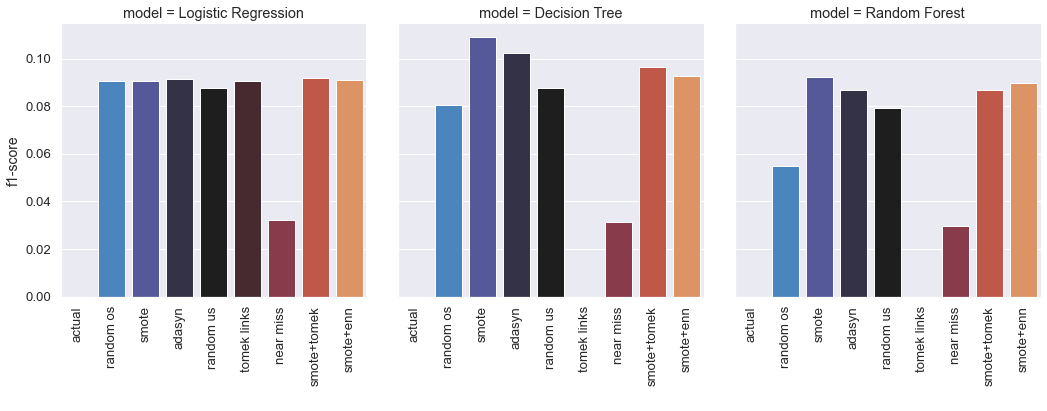

In [122]:
sns.set(font_scale=1.2)
#sns.palplot(sns.color_palette())
g = sns.FacetGrid(clf_eval_df, col="model", height=5)
g.map(sns.barplot, "resample", "f1-score", palette='icefire', order=["actual", "random os", "smote", "adasyn", "random us", "tomek links", "near miss", "smote+tomek", "smote+enn"])
g.set_xticklabels(rotation=90)
g.set_xlabels(' ', fontsize=14)
g.set_ylabels('f1-score', fontsize=14)

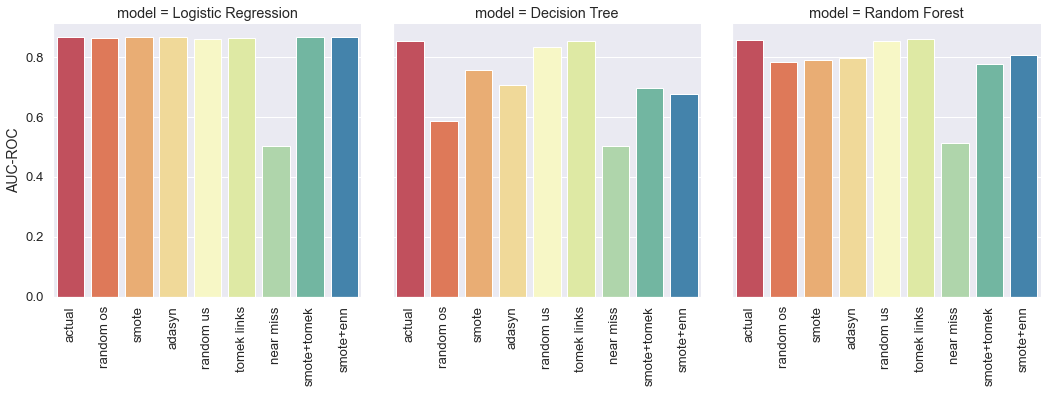

In [123]:
sns.set(font_scale=1.2)
#sns.palplot(sns.color_palette())
g = sns.FacetGrid(clf_eval_df, col="model", height=5)
g.map(sns.barplot, "resample", "AUC-ROC", palette='Spectral', order=["actual", "random os", "smote", "adasyn", "random us", "tomek links", "near miss", "smote+tomek", "smote+enn"])
g.set_xticklabels(rotation=90)
g.set_xlabels(' ', fontsize=14)
g.set_ylabels('AUC-ROC', fontsize=14)

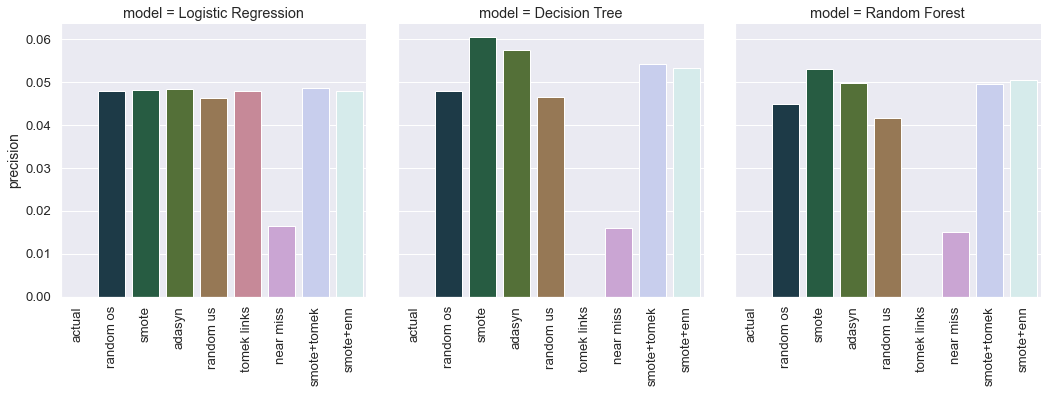

In [124]:
sns.set(font_scale=1.2)
#sns.palplot(sns.color_palette())
g = sns.FacetGrid(clf_eval_df, col="model", height=5)
g.map(sns.barplot, "resample", "precision", palette='cubehelix', order=["actual", "random os", "smote", "adasyn", "random us", "tomek links", "near miss", "smote+tomek", "smote+enn"])
g.set_xticklabels(rotation=90)
g.set_xlabels(' ', fontsize=14)
g.set_ylabels('precision', fontsize=14)